# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [15]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [16]:
import zipfile
import pandas as pd
import requests
import StringIO

def get_zip_file_object(url):
    ct = requests.get(url).content
    ct = StringIO.StringIO(ct)
    return zipfile.ZipFile(ct,'r')

url= "http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip"
zf = get_zip_file_object(url)
file_list = zf.namelist()
salaries = pd.read_csv(zf.open(file_list[file_list.index('Salaries.csv')]))
teams = pd.read_csv(zf.open(file_list[file_list.index('Teams.csv')]))

print salaries.head()
print teams.head()

   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667
   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Boston Red Stockings       So

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [17]:
salary_summary = salaries.groupby(by=['yearID','teamID'], as_index=False).sum()
print salary_summary

     yearID teamID     salary
0      1985    ATL   14807000
1      1985    BAL   11560712
2      1985    BOS   10897560
3      1985    CAL   14427894
4      1985    CHA    9846178
5      1985    CHN   12702917
6      1985    CIN    8359917
7      1985    CLE    6551666
8      1985    DET   10348143
9      1985    HOU    9993051
10     1985    KCA    9321179
11     1985    LAN   10967917
12     1985    MIN    5764821
13     1985    ML4   11284107
14     1985    MON    9470166
15     1985    NYA   14238204
16     1985    NYN   10834762
17     1985    OAK    9058606
18     1985    PHI   10124966
19     1985    PIT    9227500
20     1985    SDN   11036583
21     1985    SEA    4613000
22     1985    SFN    8221714
23     1985    SLN   11817083
24     1985    TEX    7676500
25     1985    TOR    8812550
26     1986    ATL   17102786
27     1986    BAL   13001258
28     1986    BOS   14402239
29     1986    CAL   14427258
..      ...    ...        ...
798    2013    ARI   90132000
799    201

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [18]:
summary = pd.merge(salary_summary,teams,how="inner",on=['yearID','teamID'])
print summary.head()

   yearID teamID    salary lgID franchID divID  Rank    G  Ghome   W  \
0    1985    ATL  14807000   NL      ATL     W     5  162     81  66   
1    1985    BAL  11560712   AL      BAL     E     4  161     81  83   
2    1985    BOS  10897560   AL      BOS     E     5  163     81  81   
3    1985    CAL  14427894   AL      ANA     W     2  162     79  90   
4    1985    CHA   9846178   AL      CHW     W     3  163     81  85   

      ...        DP    FP               name                           park  \
0     ...       197  0.97     Atlanta Braves  Atlanta-Fulton County Stadium   
1     ...       168  0.98  Baltimore Orioles               Memorial Stadium   
2     ...       161  0.97     Boston Red Sox                 Fenway Park II   
3     ...       202  0.98  California Angels                Anaheim Stadium   
4     ...       152  0.98  Chicago White Sox                  Comiskey Park   

  attendance  BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
0    1350137  105  106      

#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

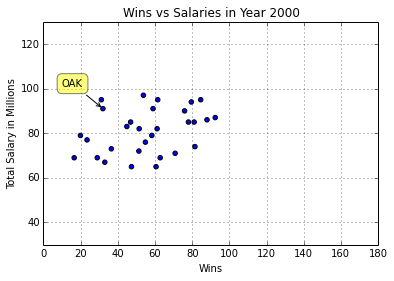

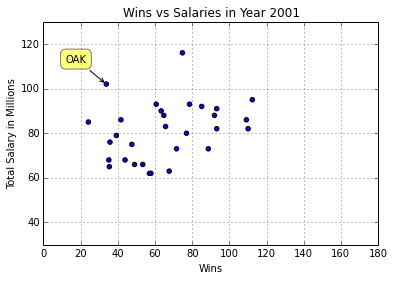

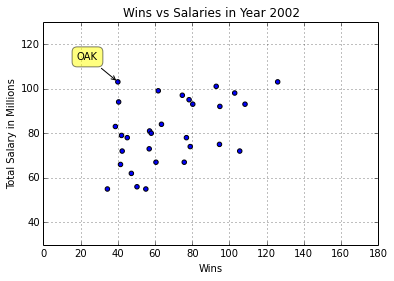

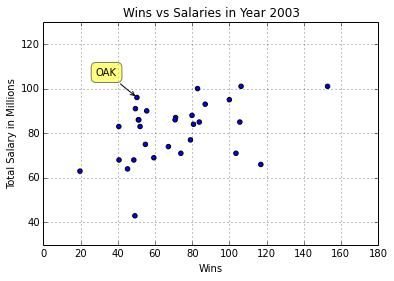

In [19]:
required_team = "OAK"
year_range = np.arange(2000,2004)

for cyear in year_range:
    required_data = summary[summary['yearID'] == cyear ][['teamID','salary','W']] 
    plt.scatter(required_data['salary'] /1e6 , required_data['W'])
    plt.title('Wins vs Salaries in Year ' + str(cyear))
    plt.ylabel('Total Salary in Millions')
    plt.xlabel('Wins')
    plt.xlim(0,180)
    plt.ylim(30,130)
    plt.grid()
    plt.annotate(required_team,xy=(required_data['salary'][required_data['teamID']==required_team]/1e6,
                                   required_data['W'][required_data['teamID']==required_team]),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 xytext=(-20,20),arrowprops=dict(arrowstyle = '->',facecolor='black', connectionstyle = 'arc3,rad=0')
                )
    plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [20]:
teamName = 'OAK'
years = np.arange(1999, 2005)
required_df = pd.DataFrame()

for yr in years: 
    df = summary[summary['yearID'] == yr]
    salaries = df['salary'].values / 1e6
    wins = df['W'].values
    A = np.array([salaries, np.ones(len(salaries))])
    m,c = np.linalg.lstsq(A.T,wins)[0] # coefficients
    required_df[yr] = y-(m*x_list+c)

required_df.index = df['teamID']
required_df = required_df.T
required_df.index = required_df.index.format()

required_df.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

NameError: name 'y' is not defined

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [28]:
url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries = pd.read_csv(url)
print countries.head()

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [22]:
income_url = "https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls"
income_content = StringIO.StringIO(requests.get(income_url).content)
income = pd.read_excel(income_content)
print income.head()

/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


          GDP per capita         1800         1801         1802         1803  \
0               Abkhazia          NaN          NaN          NaN          NaN   
1            Afghanistan   634.400014   634.400014   634.400014   634.400014   
2  Akrotiri and Dhekelia          NaN          NaN          NaN          NaN   
3                Albania   860.587966   861.481754   862.376469   863.272114   
4                Algeria  1360.000000  1361.635788  1363.271576  1364.907363   

          1804         1805         1806         1807         1808  \
0          NaN          NaN          NaN          NaN          NaN   
1   634.400014   634.400014   634.400014   634.400014   634.400014   
2          NaN          NaN          NaN          NaN          NaN   
3   864.168689   865.066196   865.964634   866.864005   867.764311   
4  1366.543151  1368.178939  1369.814727  1371.450514  1373.086302   

       ...               2004          2005          2006          2007  \
0      ...             

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [23]:
income.index = income[income.columns[0]]
income = income.drop(income.columns[0],axis=1)
income = income.transpose()

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

Index([                    u'Abkhazia',                  u'Afghanistan',
              u'Akrotiri and Dhekelia',                      u'Albania',
                            u'Algeria',               u'American Samoa',
                            u'Andorra',                       u'Angola',
                           u'Anguilla',          u'Antigua and Barbuda', 
       ...
                     u'Western Sahara',                      u'Vietnam',
              u'Virgin Islands (U.S.)', u'Yemen Arab Republic (Former)',
          u'Yemen Democratic (Former)',                  u'Yemen, Rep.',
                         u'Yugoslavia',                       u'Zambia',
                           u'Zimbabwe',                        u'Åland'],
      dtype='object', name=u'GDP per capita', length=260)


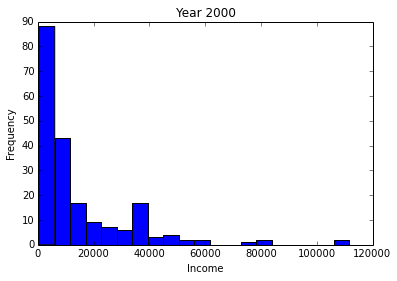

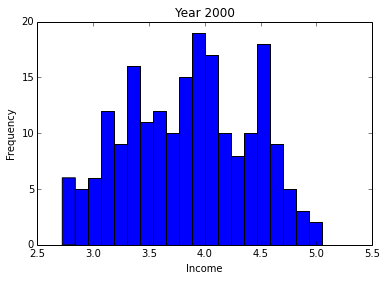

In [24]:
req_year = 2000
plt.plot(subplots=True)
print income.columns
plt.hist(income.ix[req_year].dropna().values,bins=20)
plt.title("Year %i" % req_year)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

plt.hist(np.log10(income.ix[req_year].dropna().values),bins=20)
plt.title("Year %i" % req_year)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [26]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

def mergeByYear(year):
    income_df = pd.DataFrame(income.ix[year].values,columns=['Income'])
    income_df['Country'] = income.columns
    return pd.merge(income_df,countries,how="inner",on="Country")

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

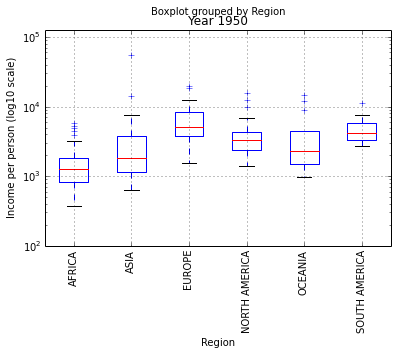

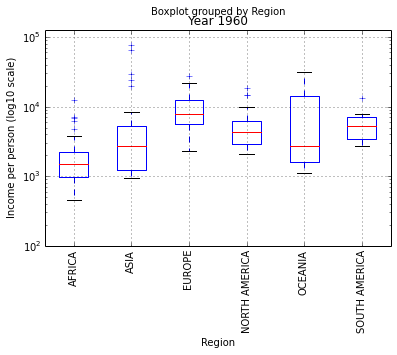

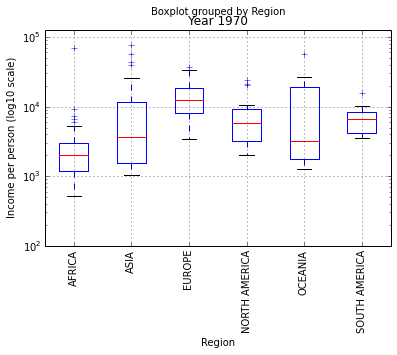

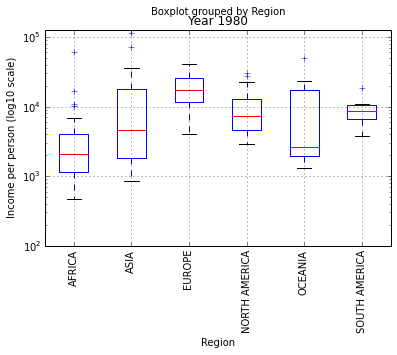

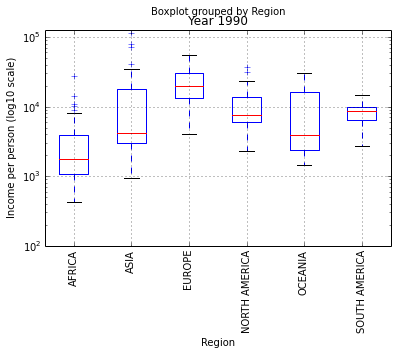

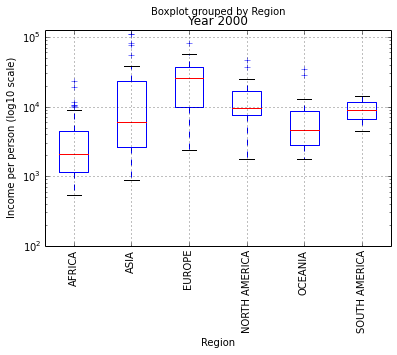

In [29]:
req_years = np.arange(1950,2010,10)

for cyear in req_years:
    df = mergeByYear(cyear)
    df.boxplot('Income',by='Region',rot=90)
    plt.title("Year " + str(cyear))
    plt.ylabel('Income per person (log10 scale)')
    plt.ylim(10**2, 10.5 **5)
    plt.yscale("log")

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [8]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
def ratioNormals(diff,a):
    X = scipy.stats.norm(loc=diff,scale=1)
    Y = scipy.stats.norm(loc=0,scale=1)
    
    return X.sf(a)/Y.sf(a)

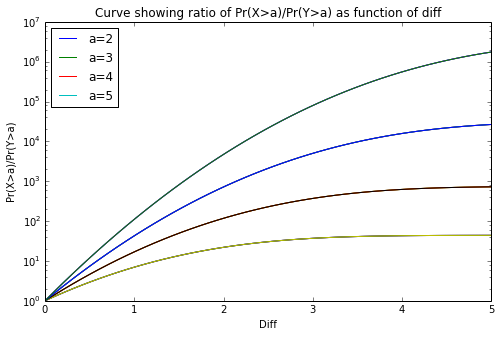

In [13]:
import numpy as np
diffs = np.linspace(0,5,50)
a = [2,3,4,5]

plt.figure(figsize=(8,5))
for a_value in a:
    ratios = [ratioNormals(diff,a) for diff in diffs]
    plt.plot(diffs,ratios)

plt.legend(["a={}".format(a_value) for a_value in a],loc=0)
plt.xlabel("Diff")
plt.ylabel("Pr(X>a)/Pr(Y>a)")
plt.title("Curve showing ratio of Pr(X>a)/Pr(Y>a) as function of diff")
plt.yscale("log")

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

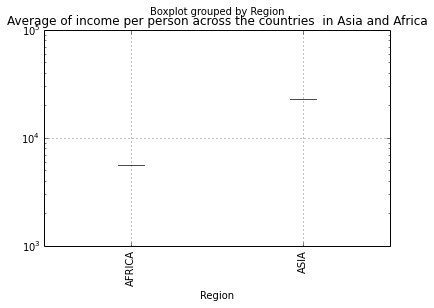

In [87]:
result_df = mergeByYear(2012)
result_df = result_df.groupby(['Region'],as_index=False).mean()
result_df = result_df.loc[(result_df.Region == "ASIA") | (result_df.Region == "AFRICA")]
#result_df.head()
result_df.boxplot('Income',by='Region',rot=90)
plt.title("Average of income per person across the countries  in Asia and Africa")
plt.yscale('log')
plt.show()

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [60]:
result_df = mergeByYear(2012)
c1 = len(result_df[(result_df.Region=='ASIA') & (result_df.Income > 10000)])
c2 = len(result_df[(result_df.Region=='ASIA')])
d1 = len(result_df[(result_df.Region=='AFRICA') & (result_df.Income > 10000)])
d2 = len(result_df[(result_df.Region=='AFRICA')])

c1*1.0/c2
d1*1.0/d2

0.20408163265306123

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


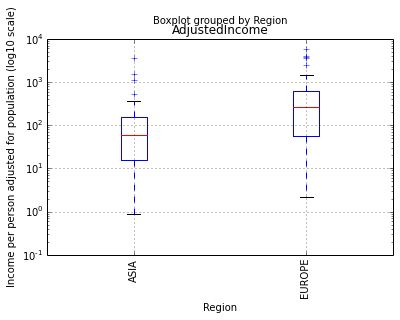

In [86]:
population_url = "https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xls"
population = pd.read_excel(StringIO.StringIO(requests.get(population_url).content))
population.columns = ['Country'] + list(population.columns)[1:]

def mergeByYearWithPop(year):
    
    income_df = pd.DataFrame(income.ix[year].values,columns=['Income'])
    income_df['Country'] = income.columns
    
    cjoin = pd.merge(income_df,countries,how="inner",on=['Country'])
    
    population_df = population[['Country',year]]
    cjoin = pd.merge(cjoin,population_df,how="inner",on=['Country'])
    cjoin.columns = list(cjoin.columns[:-1])+['TotalPopulation']
    
    def aggregate(df):
        total_population = df.sum()['TotalPopulation']
        result = df
        result['AdjustedIncome'] = (df.Income*df.TotalPopulation*1.0)/float(total_population)
        return result
    
    returned_frame = cjoin.groupby('Region').apply(aggregate)
    return returned_frame
    
result_df = mergeByYearWithPop(2012)
result_df = result_df[(result_df.Region == 'ASIA') | (result_df.Region == 'EUROPE')]
result_df.boxplot('AdjustedIncome',by='Region',rot=90)
plt.yscale('log')
plt.ylabel('Income per person adjusted for population (log10 scale)')
plt.show()



## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
